In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tweets = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('image_prediction_clean.csv')
predictions_result = pd.read_csv('prediction_results.csv')

In [3]:
tweets.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,classification,favorits_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,38830.0,8595.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,33263.0,6316.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN,25059.0,4192.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN,42207.0,8707.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN,40358.0,9481.0


In [4]:
tweets.describe()

,tweet_id,rating_numerator,rating_denominator,rating,favorits_count,retweet_count
count,2.108000e+03,2108.000000,2108.000000,2108.000000,2107.000000,2107.000000
mean,7.368379e+17,12.184535,10.446395,1.169062,8978.654010,2806.744661
std,6.709975e+16,40.259842,6.627772,3.955597,12573.165081,4741.112611
min,6.660209e+17,0.000000,2.000000,0.000000,79.000000,13.000000
25%,6.768893e+17,10.000000,10.000000,1.000000,2008.000000,626.000000
50%,7.102111e+17,11.000000,10.000000,1.100000,4131.000000,1367.000000
75%,7.880674e+17,12.000000,10.000000,1.200000,11251.500000,3194.000000
max,8.924206e+17,1776.000000,170.000000,177.600000,143495.000000,77416.000000


In [6]:
predictions.head()

,tweet_id,jpg_url,img_num
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1


In [7]:
predictions_result.head()

,tweet_id,race_prediction,confidence,race,prediction
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,1
1,666029285002620928,redbone,0.506826,True,1
2,666033412701032449,German_shepherd,0.596461,True,1
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,1
4,666049248165822465,miniature_pinscher,0.560311,True,1


In [8]:
predictions_result.describe()

,tweet_id,confidence,prediction
count,6.225000e+03,6.225000e+03,6225.000000
mean,7.384514e+17,2.631537e-01,2.000000
std,6.784113e+16,2.908324e-01,0.816562
min,6.660209e+17,1.740170e-10,1.000000
25%,6.764706e+17,5.123350e-02,1.000000
50%,7.119988e+17,1.351790e-01,2.000000
75%,7.932110e+17,3.796240e-01,3.000000
max,8.924206e+17,1.000000e+00,3.000000


In [3]:
tweets.source.value_counts()

Twitter for iPhone     1974
Vine - Make a Scene      92
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

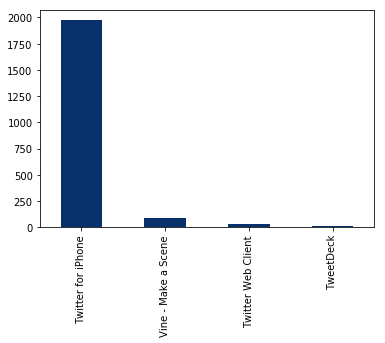

In [9]:
#local ou dispositivos onde foram feitos os tweets
tweets.source.value_counts().plot(kind='bar',colormap='Blues_r');

In [10]:
#As 10 raças mais reconhecidas pelo algoritmo com confiança acima de 95% 
predictions_result[(predictions_result.race) & (predictions_result.confidence > 0.95)].race_prediction.value_counts()[0:9]

pug                   21
Samoyed               20
Pembroke              19
golden_retriever      18
Pomeranian            13
Labrador_retriever    10
Chihuahua              9
French_bulldog         8
chow                   7
Name: race_prediction, dtype: int64

In [4]:
#considerando que Race = True significa que o algoritmo achou uma raça de cachoro, independente de qual.
p1 = predictions_result[predictions_result.prediction == 1].race.value_counts()
p2 = predictions_result[predictions_result.prediction == 2].race.value_counts()
p3 = predictions_result[predictions_result.prediction == 3].race.value_counts()

print(p1)
print(p2)
print(p3)

True     1532
False     543
Name: race, dtype: int64
True     1553
False     522
Name: race, dtype: int64
True     1499
False     576
Name: race, dtype: int64


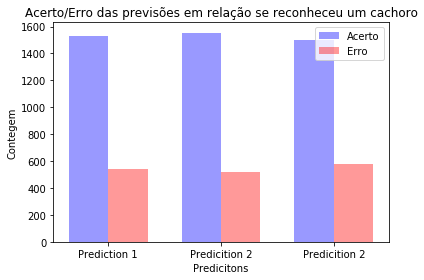

In [12]:
#Gerando o gráfico com acertos e erros do algoritmo
n_groups = 3

p_true = (p1[1],p2[1],p3[1])
p_false = (p1[0],p2[0],p3[0])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, p_true, bar_width,
                alpha=opacity, color='b',
                label='Acerto')

rects2 = ax.bar(index + bar_width, p_false, bar_width,
                alpha=opacity, color='r',
                label='Erro')

ax.set_xlabel('Predicitons')
ax.set_ylabel('Contegem')
ax.set_title('Acerto/Erro das previsões em relação se reconheceu um cachoro')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Prediction 1', 'Predicition 2', 'Predicition 2'))
ax.legend()

fig.tight_layout()
plt.show()

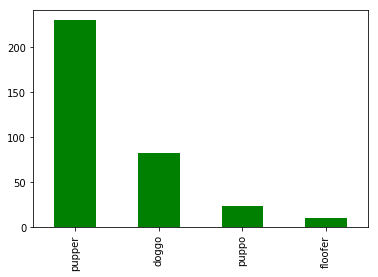

In [13]:
# dos Tweets que tem classificação, pupper é a classificação mais recorrente
tweets.classification.value_counts().plot(kind='bar',colormap='ocean');

In [18]:
#assumindo que quanto maior a contagem de retweets e favoritos quer dizer maior popularidade
tweets.groupby(['classification'])[['retweet_count', 'favorits_count']].mean()

,retweet_count,favorits_count
classification,,
doggo,6288.253012,17547.614458
floofer,3963.600000,11440.900000
pupper,2503.659389,7417.558952
puppo,7093.083333,23277.541667


In [ ]:
tweets.groupby(['classification'])[['retweet_count', 'favorits_count']].mean().plot(kind='bar',title="Populariade dos tipos de cachorros");